# Metricas para clasificadores

En este notebook se va a mostrar algunas de las métricas más comunes utilizadas en los algoritmos de clasificación para medir su eficiencia.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Conjunto de datos.

Vamos a crear un dataset manual sobre pacientes con cancer donde:

*   0 = No tiene cancer
*   1 = Si tiene cancer



In [ ]:
# Datos con la clase (resultado) del dataset de entrenamiento

y_train   = [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
print(len(y_train))

y_predict = [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
print(len(y_predict))


15
15


# Funciones

In [ ]:
def calcula_metricas(y_train, y_predict, average='binary'):
    """ Calcula las métricas utilizando sklearn """

    # proporción de predicciones correctas (tanto positivas como negativas)  ( (TP + TN) / (TP+TN+FP+FN))
    accuracy = accuracy_score(y_train, y_predict)

    # rendimiento de un algoritmo de clasificación
    matrix = confusion_matrix(y_train, y_predict)

    # proporción de verdaderos positivos sobre el total de predicciones positivas (TP / (TP+FP))
    # average=average para problemas de clasificación con múltiples clases
    precision = precision_score(y_train, y_predict, average=average)

    # proporción de verdaderos positivos sobre el total de positivos reales (TP / (TP+FN))
    recall = recall_score(y_train, y_predict, average=average)

    # Media armónica de la precisión y el recall  ( 2 * Precision * Recall / (Precision + Recall) )
    f1 = f1_score(y_train, y_predict, average=average)

    return matrix, accuracy, precision, recall, f1

In [ ]:
def print_metrics(y_train, y_predict, title, average='binary'):
    """ Visualiza por pantalla la matriz de confusión y métricas """

    matrix, accuracy, precision, recall, f1 = calcula_metricas(y_train, y_predict, average)

    plt.figure(figsize=(3, 3))
    matrix = pd.DataFrame(matrix,
                          columns=["0 : No-Cancer", "1 : Cancer"]
                          )
    plt.matshow(matrix, cmap="Blues", vmin=0, vmax=10, fignum=1)
    plt.title("Reales")
    plt.ylabel("Predichas")
    plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=45)
    plt.yticks(range(len(matrix.columns)), matrix.columns)
    etiquetas = (("Verdaderos\nNegativos", "Falsos\nPositivos"),
                 ("Falsos\nNegativos", "Verdaderos\nPositivos"))
    for i in range(len(matrix.columns)):
        for j in range(len(matrix.columns)):
            plt.text(i, j + 0.14, str(matrix.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")
    plt.text(1.60, -0.30, title, fontsize=18, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=15)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=15)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=15)
    plt.text(2.1, 1.00, "F1: %0.2f" % f1, fontsize=15)
    plt.show()
    #print("\n" * 2)

# Comprobaciones

Verificamos la calidad de las predicciones para diferentes escenarios.

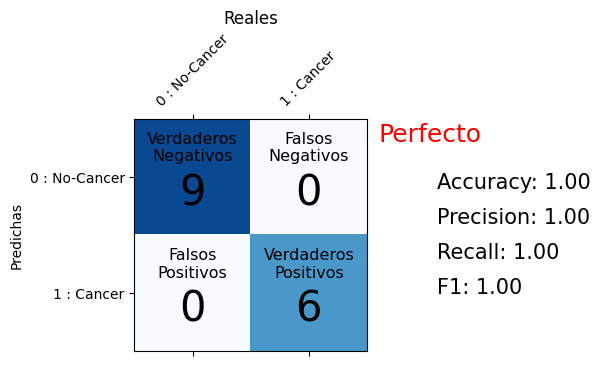

In [ ]:
# Clasificador perfecto
y_predict = [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
print_metrics(y_train, y_predict, "Perfecto")

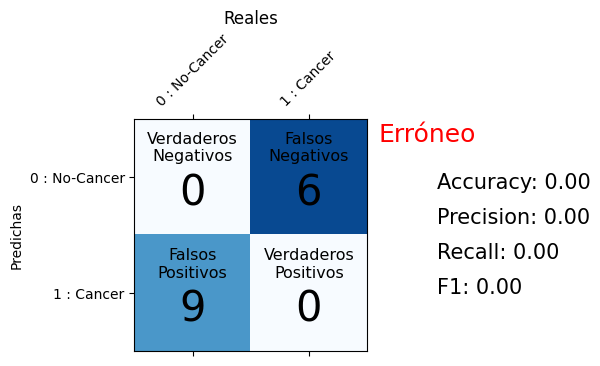

In [ ]:
# Clasificador totalmente erróneo
y_predict = [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
print_metrics(y_train, y_predict, "Erróneo")

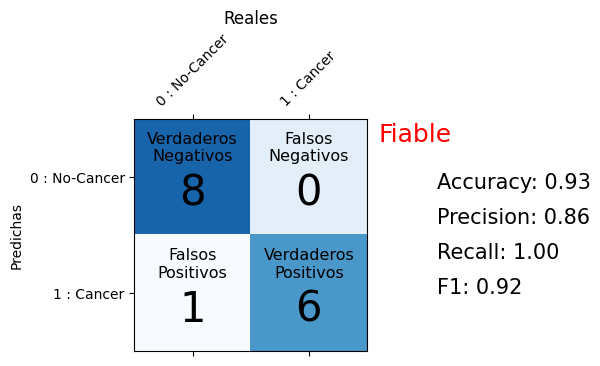

In [ ]:
# Clasificador fiable
# y_predict = [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
y_predict = [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
print_metrics(y_train, y_predict, "Fiable")

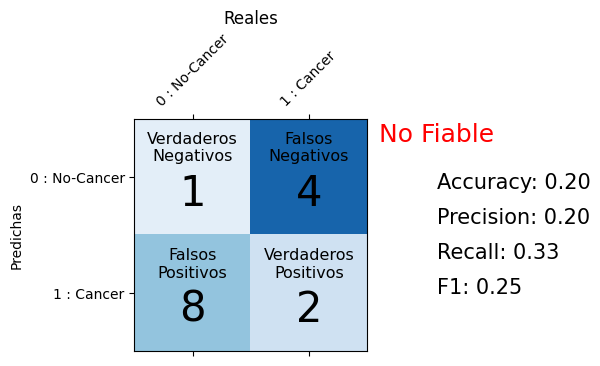

In [ ]:
# Clasificador no fiable
y_predict = [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
print_metrics(y_train, y_predict, "No Fiable")

## Vamos a crear una fución de visualización no tan customizada.

In [ ]:
def print_confusion_matrix(matrix, target_names=None):
  plt.figure(figsize=(10, 7))
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Matriz de Confusión')
  plt.show()

In [ ]:
def print_metrics2(y_train, y_predict, columns, average='binary'):
  matrix, accuracy, precision, recall, f1 = calcula_metricas(y_train, y_predict, average=average)
  print("Accuracy: %0.2f" % accuracy)
  print("Precision: %0.2f" % precision)
  print("Recall: %0.2f" % recall)
  print("F1: %0.2f" % f1)
  print_confusion_matrix(matrix, columns)

Accuracy: 0.20
Precision: 0.20
Recall: 0.33
F1: 0.25


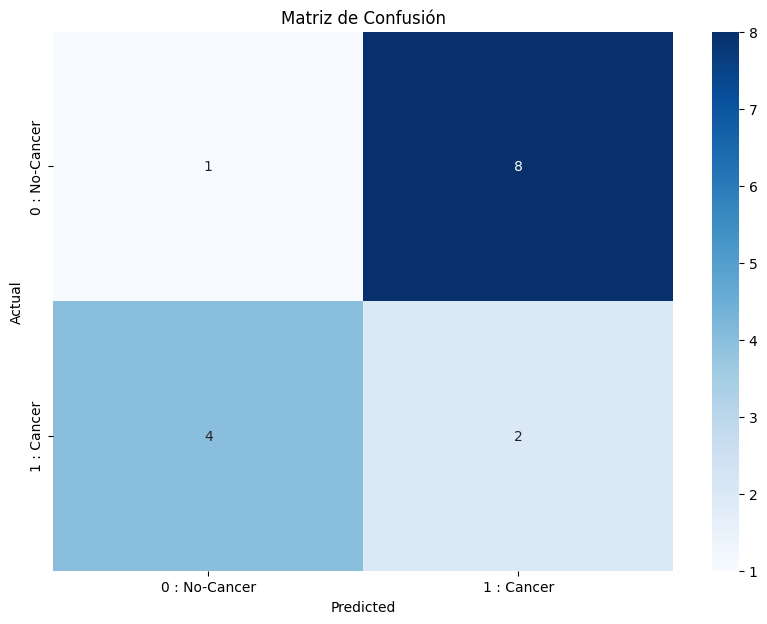

In [ ]:
# Clasificador no fiable
y_train   = [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
y_predict = [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
columns=["0 : No-Cancer", "1 : Cancer"]
print_metrics2(y_train, y_predict, columns)

In [ ]:
# otra forma de verlo

from sklearn.metrics import classification_report

report = classification_report(y_train, y_predict)
print(report)

# Support: Número de ocurrencias de cada clase en el conjunto de datos

              precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.20      0.33      0.25         6

    accuracy                           0.20        15
   macro avg       0.20      0.22      0.20        15
weighted avg       0.20      0.20      0.19        15



# EJERCICIO

Con el dataset IRIS que se encuentra en:
* from sklearn.datasets import load_iris

Objetivos
* Crear un arbol de decision
* Entrenarlo
* Probarlo
* Mostrar las siguientes métricas:

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn import tree

In [ ]:
iris = load_iris()

La función load_iris() del módulo sklearn.datasets en la biblioteca Scikit-learn carga el conjunto de datos Iris. Este conjunto de datos es muy conocido y se utiliza frecuentemente para propósitos de aprendizaje y demostración en el campo del aprendizaje automático. La función **load_iris()** **devuelve** un objeto tipo **Bunch**, que es similar a un diccionario de Python, y contiene varios atributos con los datos y la información sobre el conjunto de datos.

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
# Crear un DataFrame con los datos y los nombres de las características
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Añadir la columna de las etiquetas (clases)
df['target'] = iris.target

# Opcional: Añadir la columna con los nombres de las clases
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# TODO ...

In [1]:
# Crear Modelo
# TODO ...

In [ ]:
# Predecir las etiquetas en el conjunto de prueba
# TODO ...

In [2]:
# Visualización de los datos
# TODO ...